In [13]:
# installing mysql.connector << to connect mysql to python
!pip install mysql.connector # << this wont work then use below connector 
!pip install pymysql


<< was unexpected at this time.


In [27]:
import pymysql
import pandas as pd
# connect to server
cnx = pymysql.connect(
    host="127.0.0.1",
    port=3306,
    user="root",
    password="adi3321")
print("connected",cnx)

connected <pymysql.connections.Connection object at 0x000001D66DE76A80>


In [40]:
# In short: This line fetches all the data from the customer table and loads it into a Pandas DataFrame called df. 
#You can now analyze or manipulate the data using Pandas!
query = "SELECT * FROM banking_case.customer"
df = pd.read_sql(query, cnx)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_20252\108924283.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


In [42]:
df.head(10)

,ï»¿Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5
5,IND78532,Samuel Hudson,23,13204,07-02-2019,Douglas Tucker,American,Help Desk Technician,High,Silver,...,1307269.41,745627.74,238310.37,15615.18,1556031.06,1,2,1,1,6
6,IND95683,Timothy Alexander,46,42910,02-06-2002,Douglas Tucker,Asian,Account Coordinator,High,Gold,...,41200.18,60588.50,24639.33,3045.78,154111.62,1,1,1,2,7
7,IND40785,Carl Martin,78,6127,03-11-2000,Steve Diaz,European,Automation Specialist II,Mid,Gold,...,156983.13,53889.73,46813.78,51979.19,1171456.68,0,2,2,2,8
8,IND13570,Philip Day,67,32656,07-04-2015,Bruce Butler,Asian,Software Test Engineer II,High,Silver,...,1242347.22,328334.62,279528.12,27125.28,464560.28,0,1,2,2,9
9,IND53299,Jason Sims,51,28340,20-11-1995,Joe Price,European,Geologist III,Mid,Silver,...,317246.67,111532.03,115869.39,48043.52,908583.94,2,1,3,1,10


 # lets do data cleaning data prepration part

In [47]:
# importing all required library.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [49]:
df.shape

(3000, 25)

In [51]:
# Generate descriptive statistics for the dataframe
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [59]:
df['Estimated Income'].min()

# boxing them
0-20000
20000 - 50000

15919.48

In [69]:
# converting numerical data to catergorical data
bins = [0,100000,300000,float('inf')]
labels = ['Low','Med','High']

df['Income Band'] = pd.cut(df['Estimated Income'], bins=bins, labels=labels, right=False) 
# info pd.cut is used to 1.Group Numbers 2.Make Categories 3.Easier Analysis

<Axes: xlabel='Income Band'>

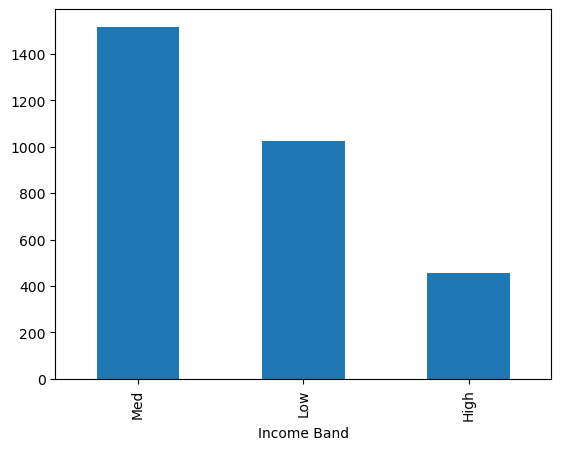

In [71]:
df['Income Band'].value_counts().plot(kind='bar')

In [85]:
df.head(10)

,ï»¿Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId,Income Band
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1,Low
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2,Med
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3,Med
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4,High
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5,Med
5,IND78532,Samuel Hudson,23,13204,07-02-2019,Douglas Tucker,American,Help Desk Technician,High,Silver,...,745627.74,238310.37,15615.18,1556031.06,1,2,1,1,6,Med
6,IND95683,Timothy Alexander,46,42910,02-06-2002,Douglas Tucker,Asian,Account Coordinator,High,Gold,...,60588.50,24639.33,3045.78,154111.62,1,1,1,2,7,Low
7,IND40785,Carl Martin,78,6127,03-11-2000,Steve Diaz,European,Automation Specialist II,Mid,Gold,...,53889.73,46813.78,51979.19,1171456.68,0,2,2,2,8,Low
8,IND13570,Philip Day,67,32656,07-04-2015,Bruce Butler,Asian,Software Test Engineer II,High,Silver,...,328334.62,279528.12,27125.28,464560.28,0,1,2,2,9,Low
9,IND53299,Jason Sims,51,28340,20-11-1995,Joe Price,European,Geologist III,Mid,Silver,...,111532.03,115869.39,48043.52,908583.94,2,1,3,1,10,Low


In [ ]:
# enumurative analysis >> enumerative analysis can often refer to examining one column (or variable) at a time,

In [79]:
# exmine the distribution of unique catergories in catergorical columns
catergorical_cols = df[["BRId","GenderId","Amount of Credit Cards","Nationality","Occupation","Fee Structure","Loyalty Classification","Properties Owned","Risk Weighting","Income Band"]]

for col in catergorical_cols:
    print(f"Value Counts for '{col}':")
    display(df[col].value_counts())

Value Counts for 'BRId':


BRId
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

Value Counts for 'GenderId':


GenderId
2    1512
1    1488
Name: count, dtype: int64

Value Counts for 'Amount of Credit Cards':


Amount of Credit Cards
1    1922
2     765
3     313
Name: count, dtype: int64

Value Counts for 'Nationality':


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

Value Counts for 'Occupation':


Occupation
Structural Analysis Engineer    28
Associate Professor             28
Recruiter                       25
Human Resources Manager         24
Account Coordinator             24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

Value Counts for 'Fee Structure':


Fee Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

Value Counts for 'Loyalty Classification':


Loyalty Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

Value Counts for 'Properties Owned':


Properties Owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64

Value Counts for 'Risk Weighting':


Risk Weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64

Value Counts for 'Income Band':


Income Band
Med     1517
Low     1027
High     456
Name: count, dtype: int64

## Univariate Analysis >> can often refer to examining one column (or variable) at a time,

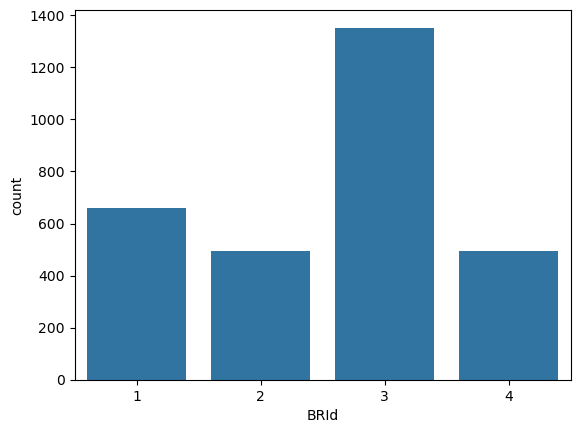

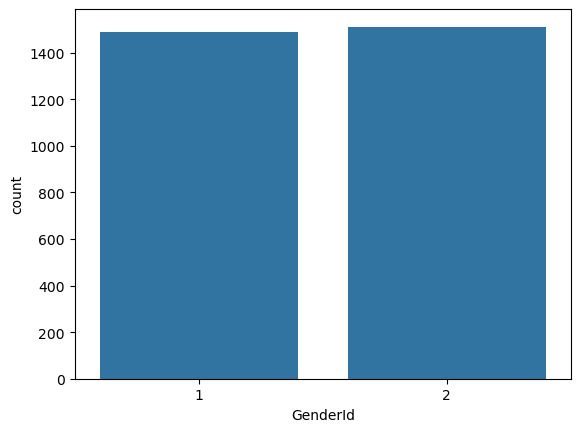

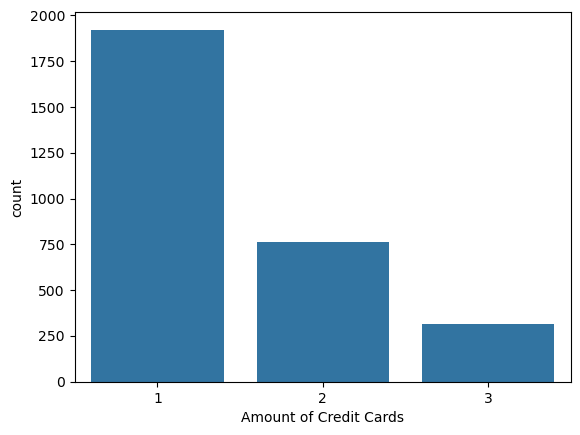

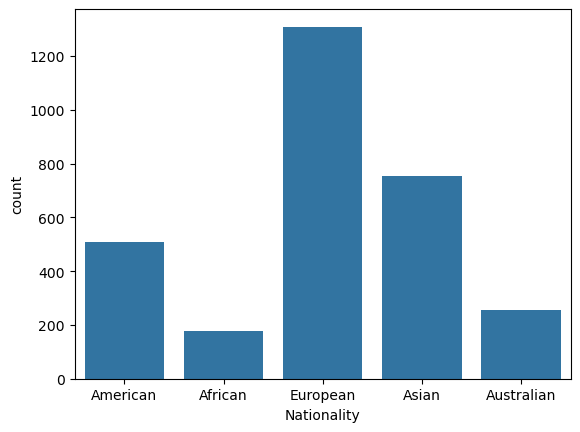

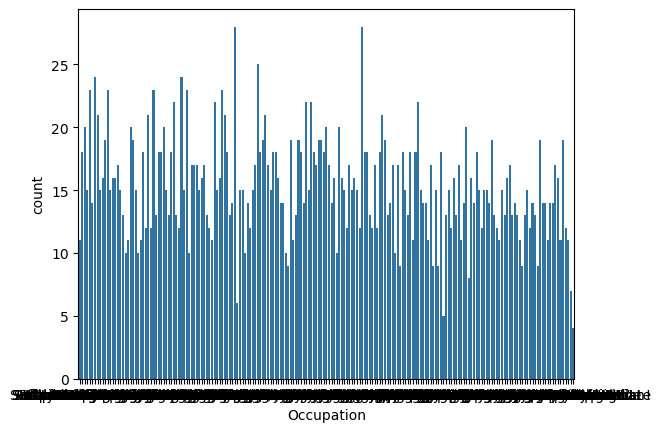

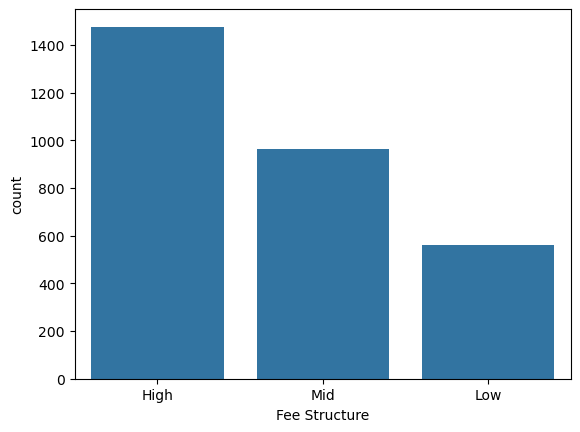

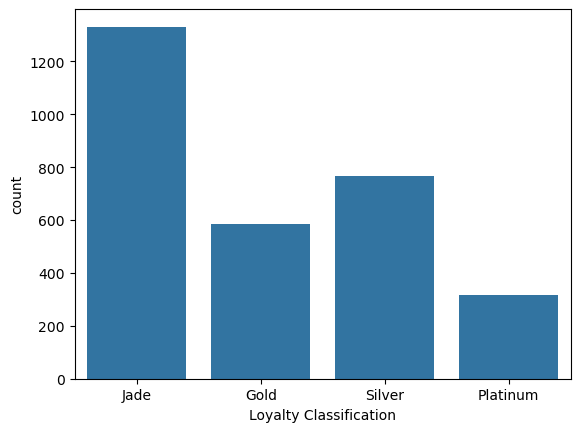

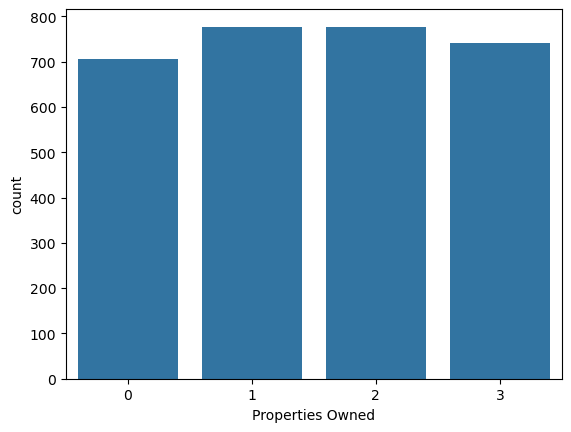

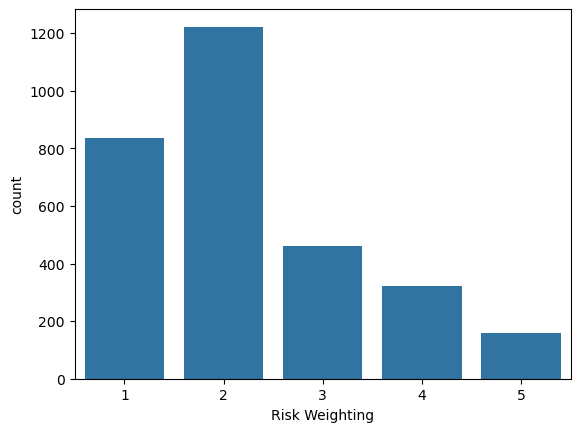

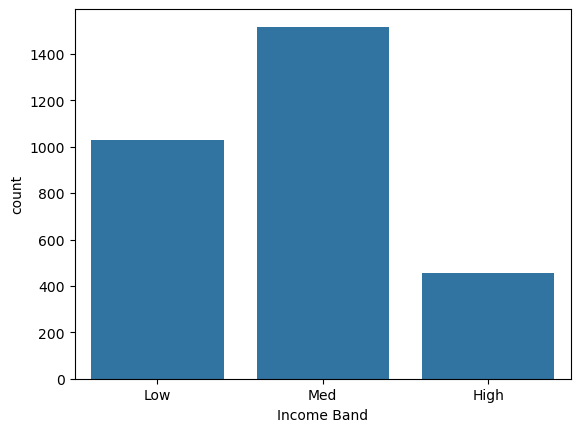

In [94]:
for i, predictor in enumerate(df[["BRId","GenderId","Amount of Credit Cards","Nationality","Occupation","Fee Structure","Loyalty Classification","Properties Owned","Risk Weighting","Income Band"]]
):
    plt.figure(i)
    sns.countplot(data=df,x=predictor)

## Bivariate Analysis >> means studying the relationship between two variables to see if they affect each other. here we are checking with gender id 

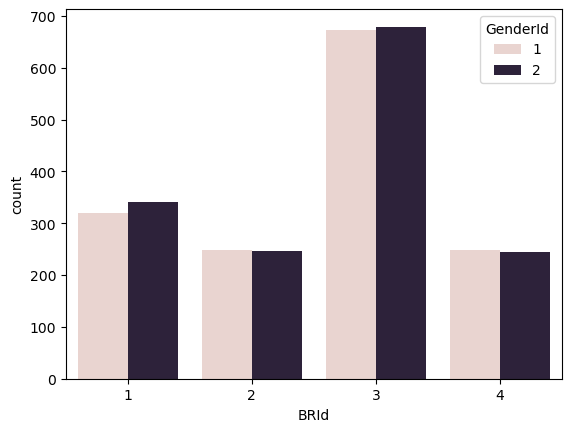

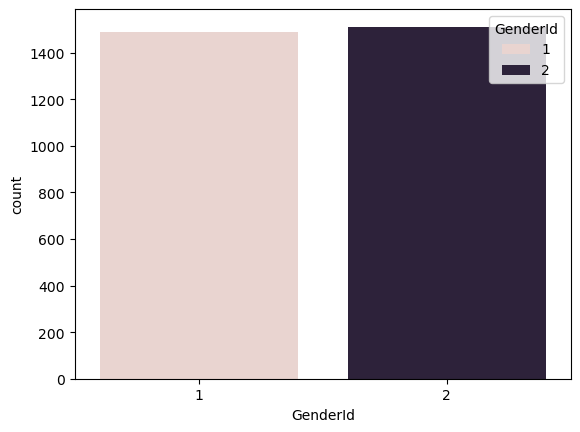

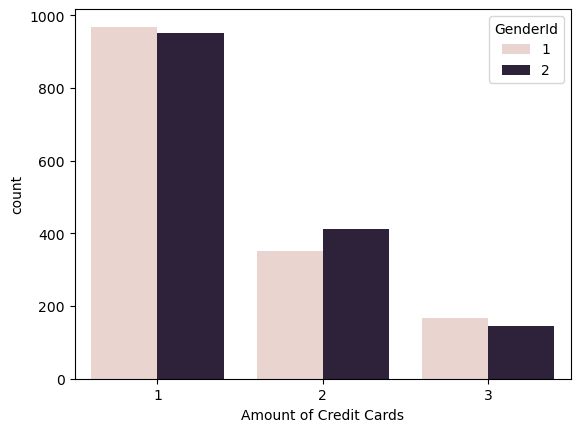

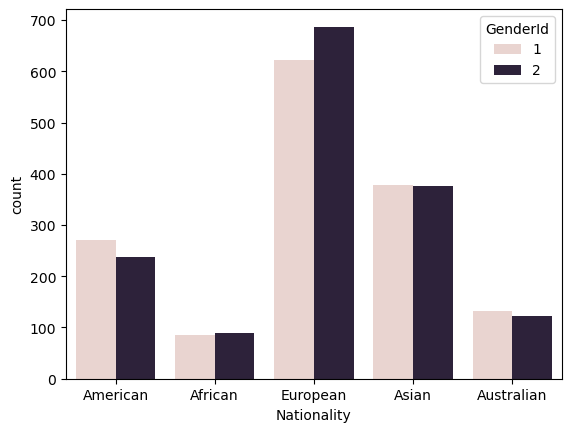

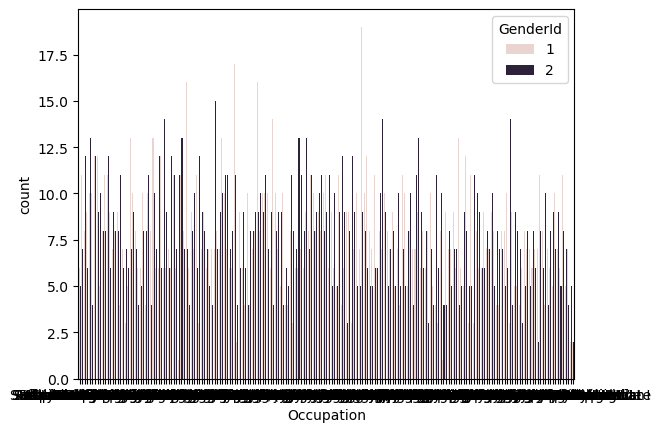

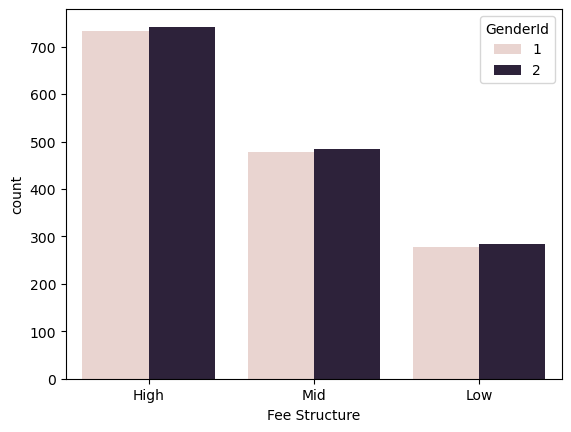

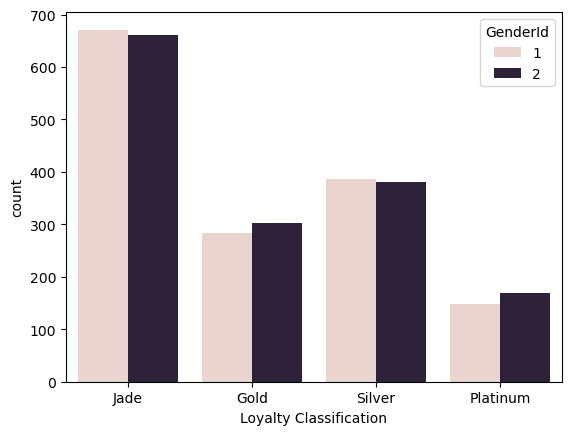

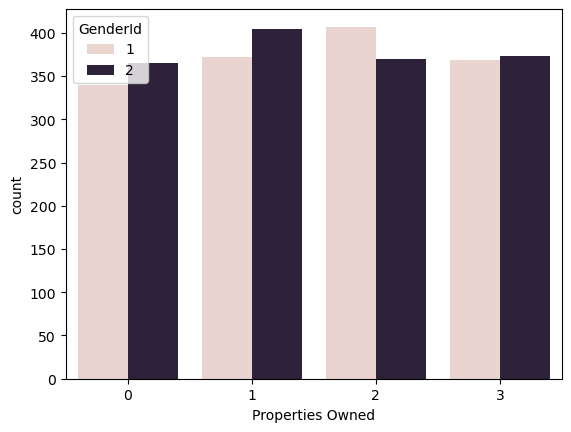

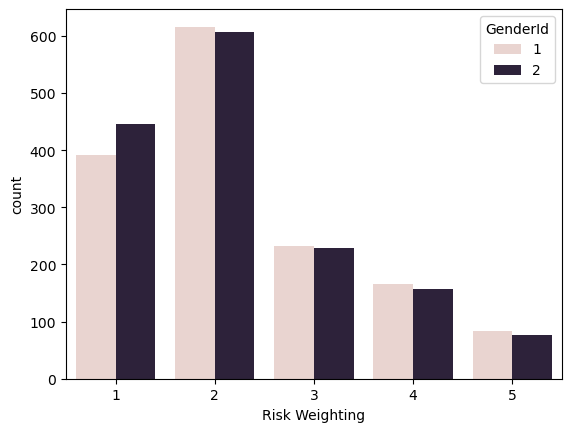

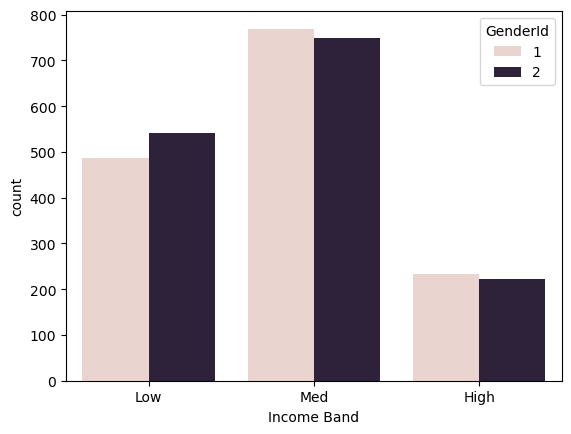

In [95]:
for i, predictor in enumerate(df[["BRId","GenderId","Amount of Credit Cards","Nationality","Occupation","Fee Structure","Loyalty Classification","Properties Owned","Risk Weighting","Income Band"]]
):
    plt.figure(i)
    sns.countplot(data=df,x=predictor,hue='GenderId')

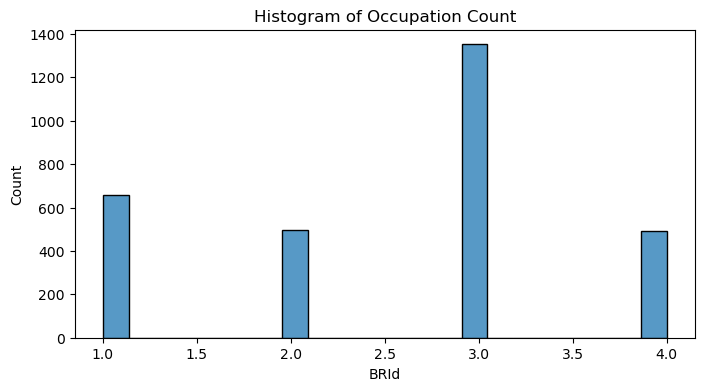

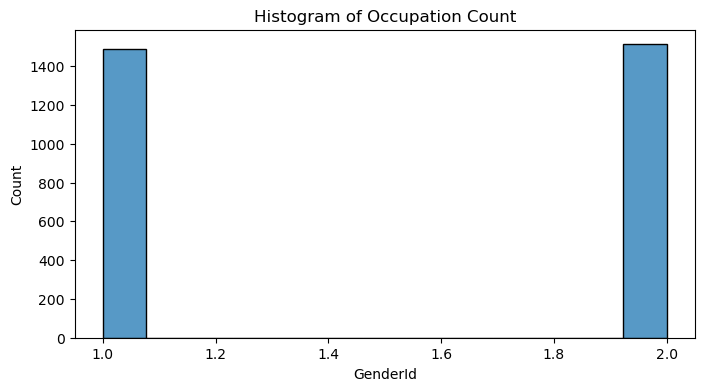

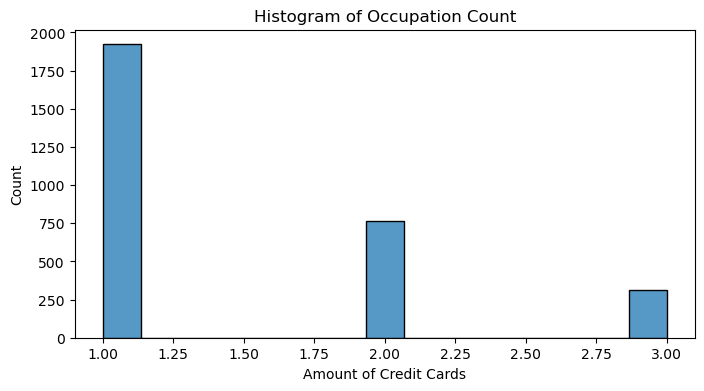

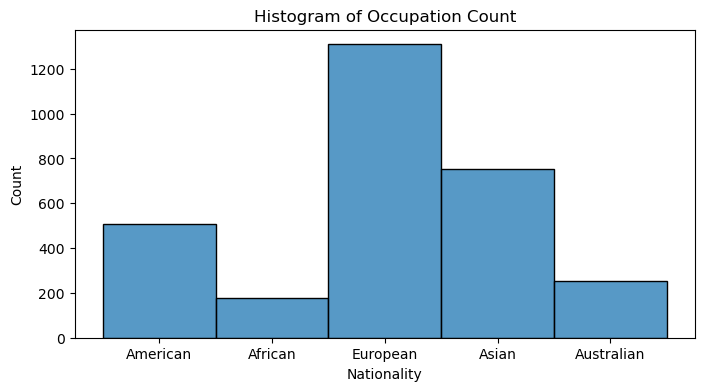

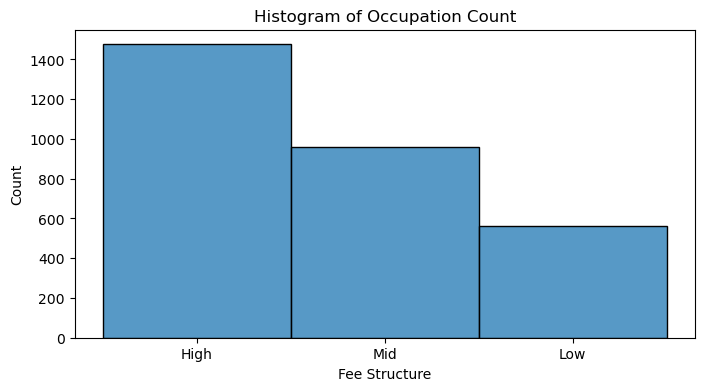

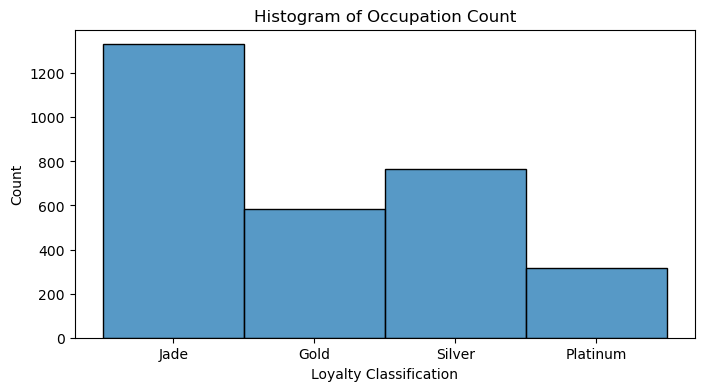

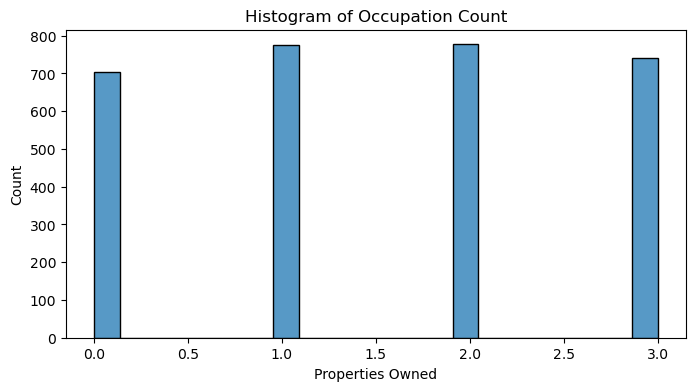

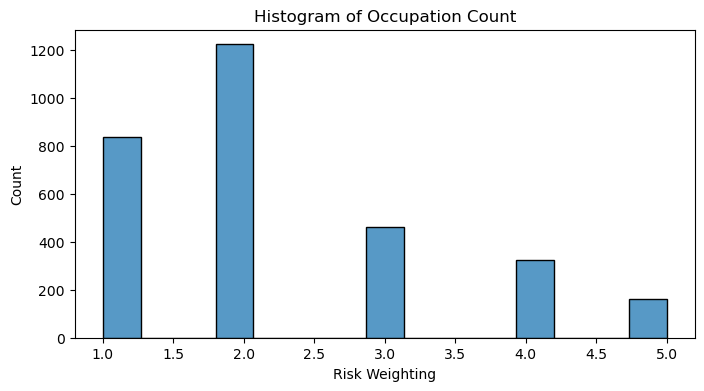

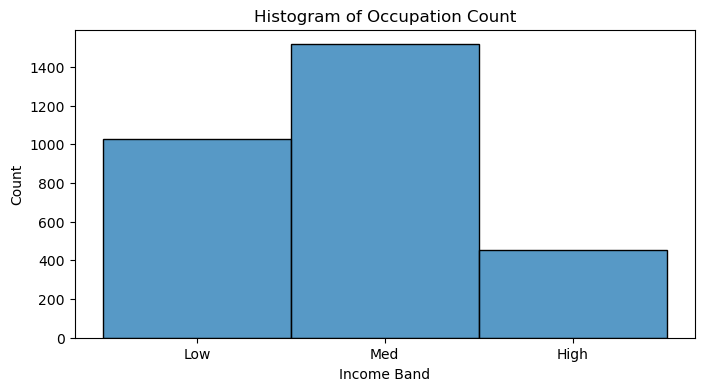

In [109]:
# HIstplot of value counts for different Occupation

for col in catergorical_cols:
  if col == "Occupation":  # it skips occuption and continue to next column
    continue
  plt.figure(figsize=(8,4))
  sns.histplot(df[col])
  plt.title('Histogram of Occupation Count')
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

# Numerical Analysis

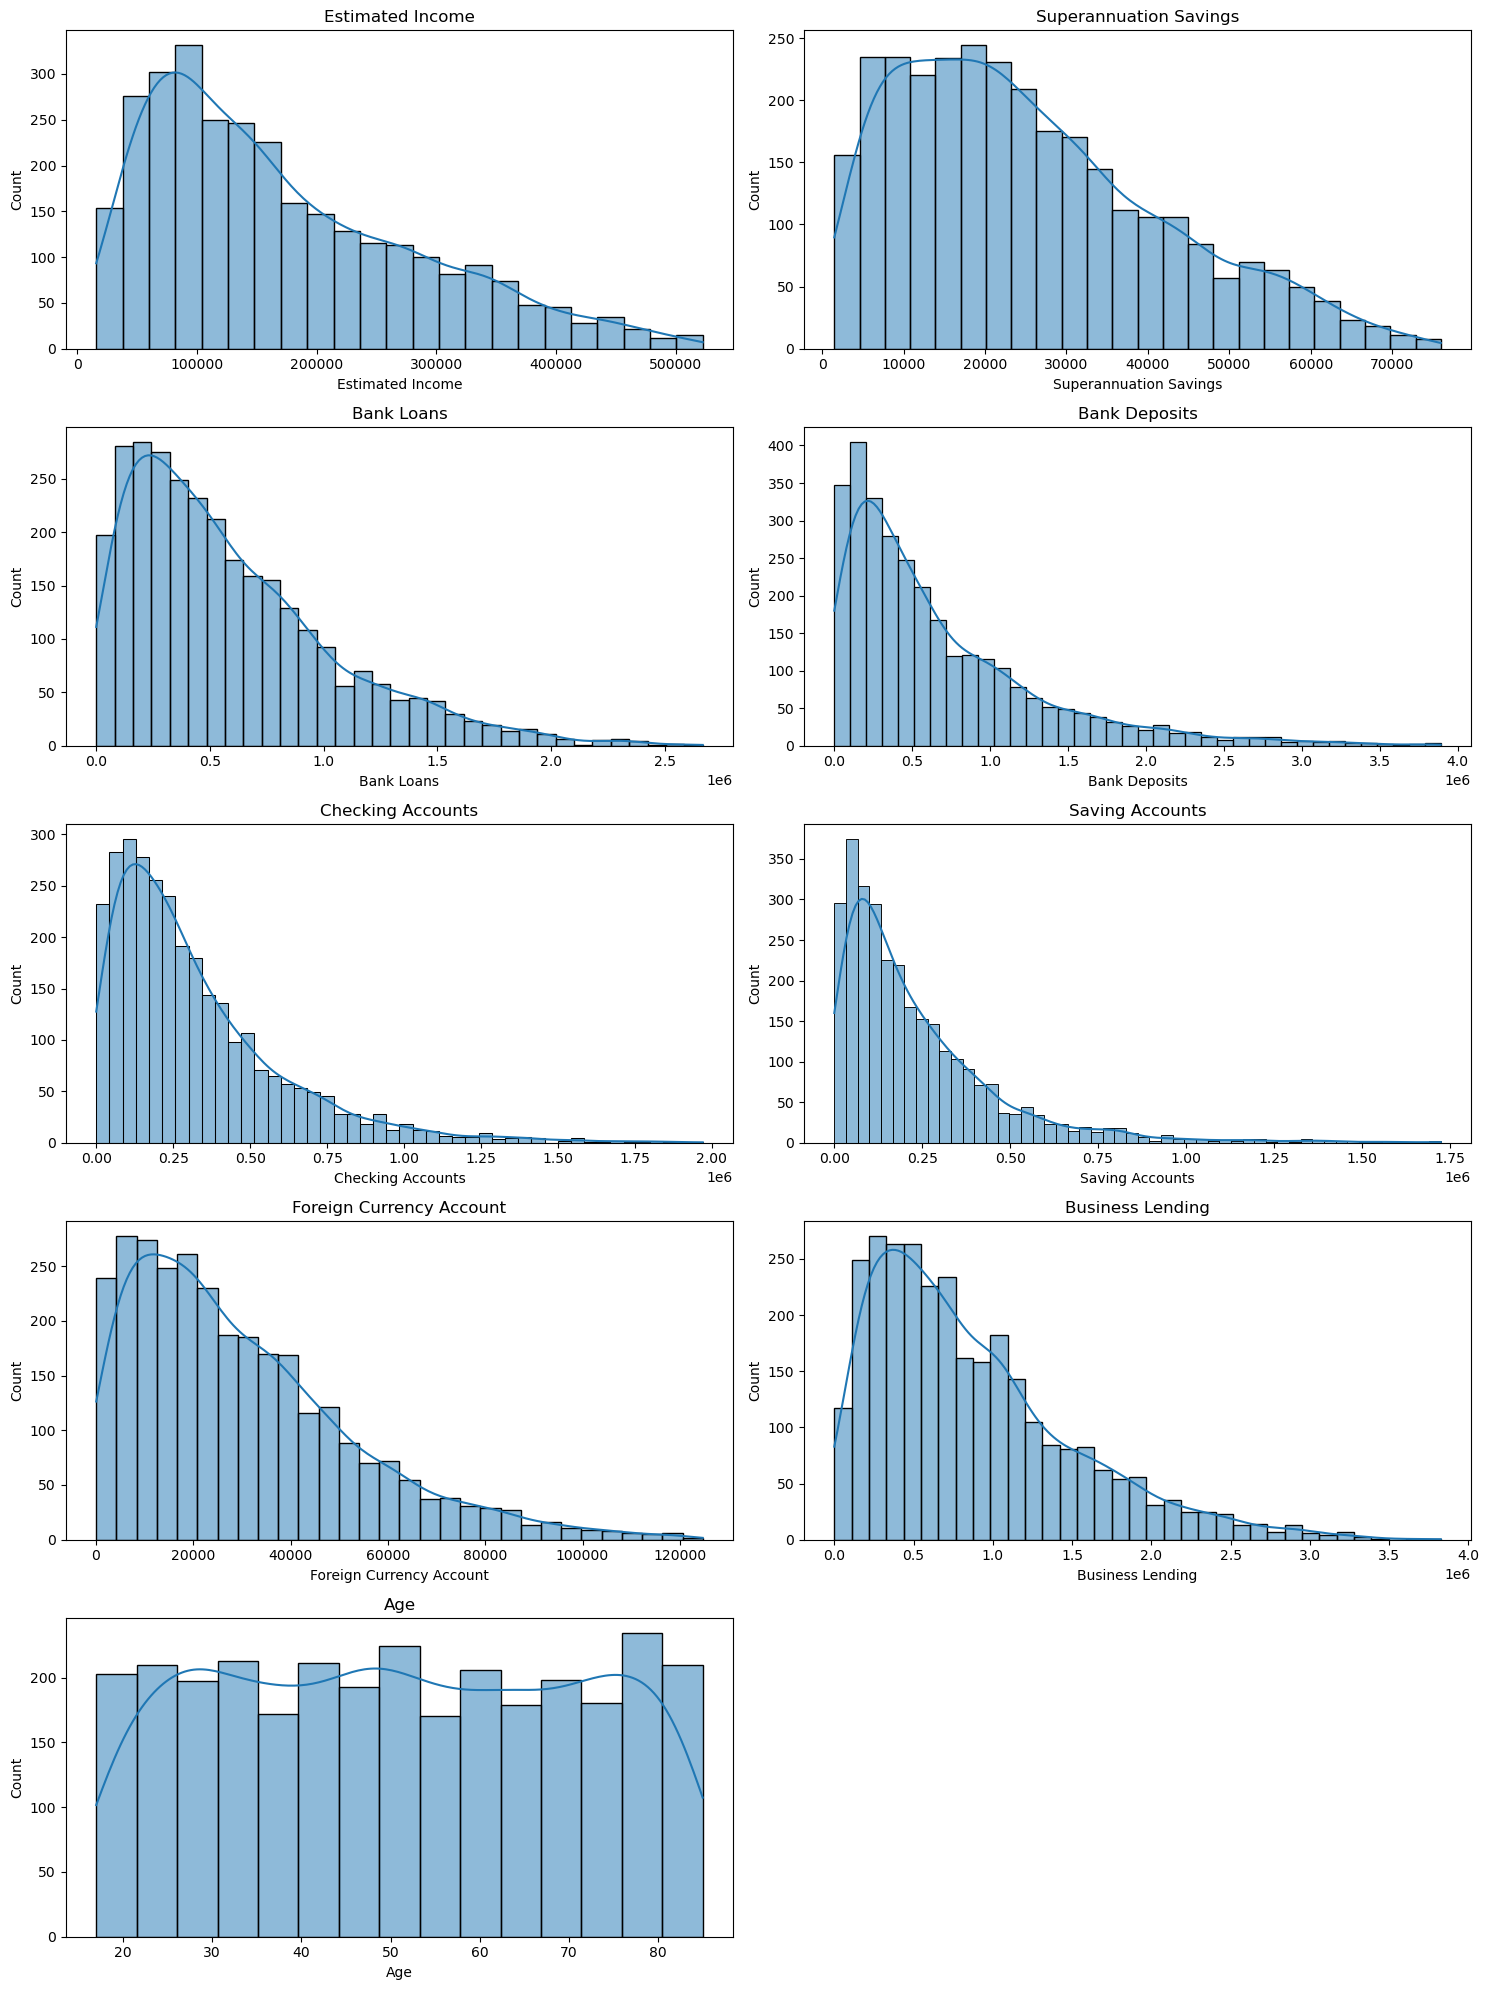

In [142]:
numerical_cols = ['Estimated Income','Superannuation Savings','Bank Loans','Bank Deposits','Checking Accounts','Saving Accounts','Foreign Currency Account','Business Lending','Age']

#Univariate analysis and visulization
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 2 + 1, 2, i)  # Dynamic layout
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

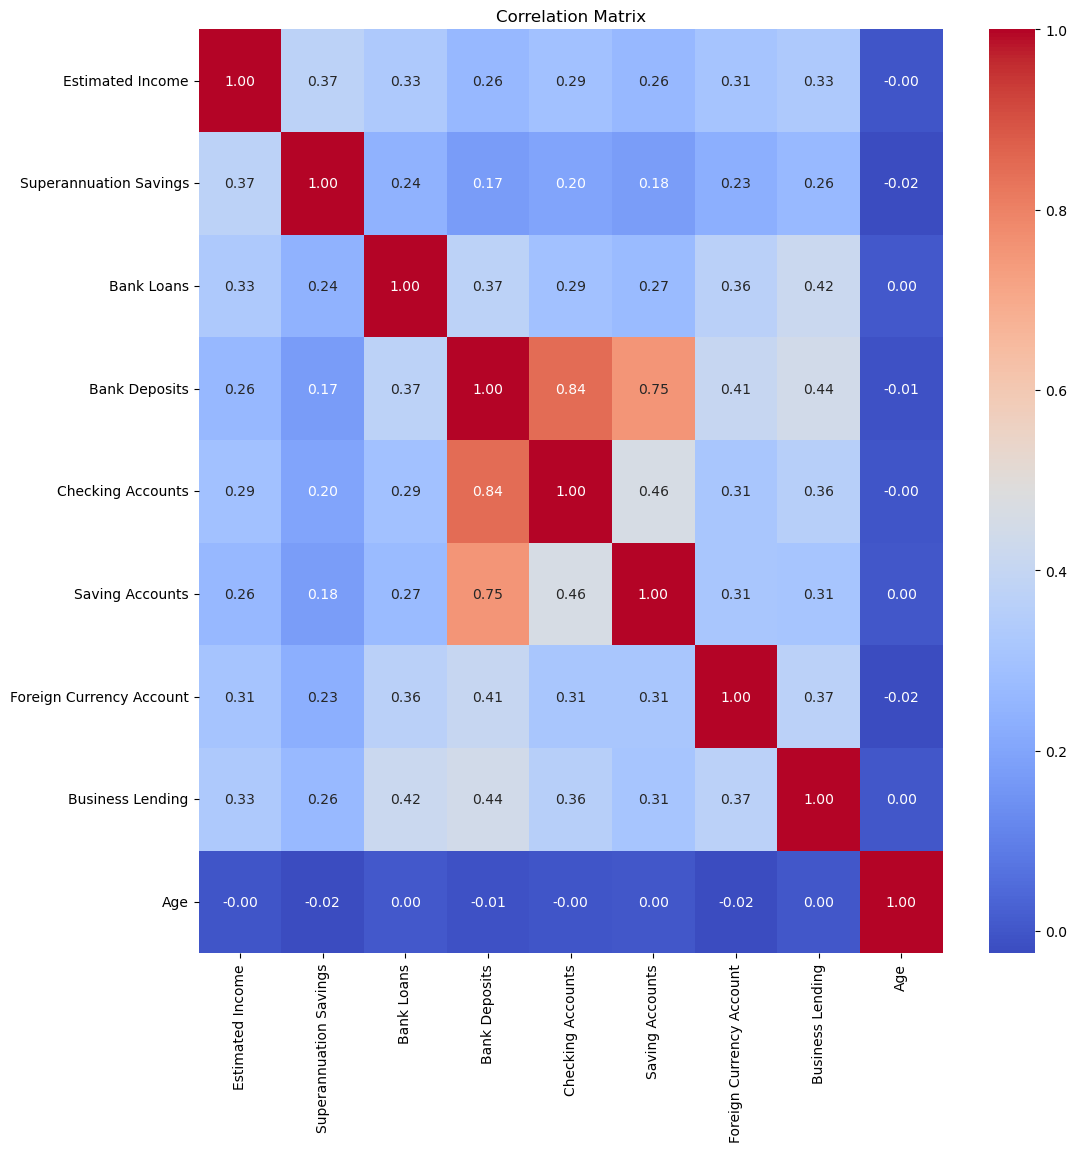

In [146]:
# HeatMap >> relationship between variables using colors
numerical_cols = ['Estimated Income','Superannuation Savings','Bank Loans','Bank Deposits','Checking Accounts','Saving Accounts','Foreign Currency Account','Business Lending','Age']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Insights of EDA
'''
 1. The strongest positive correlation occur among 'Bank Deposits' with 'Checking Acc' and 
'Foregin currency Account' indicating that customers who maintain high balances in one account
type often hold substanital amount/funds acrross other accounts as well
'''
'''
2 🌟 Customer Behavior Insight:
Customers with higher deposits tend to maintain larger balances in their checking and savings accounts, indicating a habit of 
saving after depositing.
'''
'''
3 Income Patterns Insight:
Regular income earners (like salaried employees) likely deposit their earnings directly into their accounts, naturally increasing both
deposits and balances.
'''
'''
4 🔄 Financial Habits Insight:
Many customers might move money between checking and saving accounts, causing these balances to rise and fall together.
'''
'''
5 Banking Products Insight:
The bank might offer features that automatically transfer funds between accounts, or customers might use multiple products from the same institution, leading to 
linked growth in these accounts.
'''